# 파이토치로 구현하는 신경망

## 신경망 모델 구현하기

In [1]:
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [17]:
n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)

In [7]:
print("xtrain : " ,x_train, "y_train:" ,y_train, x_test, y_test)

xtrain :  [[-1.1282036  -1.12905997]
 [ 1.27159196 -1.10643929]
 [-1.23629061  0.76912794]
 [ 1.06792706  1.4345356 ]
 [-1.13587718 -0.92016644]
 [-1.13244746  0.84942908]
 [ 0.8391046   1.01964804]
 [ 1.26627532  0.8475707 ]
 [-1.41609698 -0.47960655]
 [ 1.18899896 -0.76956188]
 [-1.24116024  1.07219918]
 [ 0.86079437 -1.14495808]
 [-0.80142253  1.06864541]
 [-0.44804846 -0.78668581]
 [-1.18836328  0.56826256]
 [-1.41887572  1.20687799]
 [-0.62240113  1.09388837]
 [-1.28224766 -1.57109661]
 [ 0.9673284   1.15634335]
 [-0.53857453  0.90318542]
 [ 0.45537734 -0.74542989]
 [-1.24829892 -0.96512391]
 [-0.65829251  0.73534507]
 [ 1.34225188 -1.20260461]
 [-0.88364739  0.89853269]
 [-0.81399816 -0.56825452]
 [-0.90436453  1.30264712]
 [ 0.97292049  1.13074483]
 [ 0.55707077 -0.3480704 ]
 [ 1.26551914  0.75237072]
 [-0.69356578  0.84574235]
 [-1.13402252  0.99923354]
 [ 1.12388713 -1.03415536]
 [-0.86017397  1.43583737]
 [-1.27324206  1.21104525]
 [ 0.7541469  -0.88552917]
 [ 1.5652002  -1.1

In [18]:
#### label 변경 : 0,1,2,3 -> 0,1

def label_map(y_, from_, to_):
    y = numpy.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0, 1], 0)
y_train = label_map(y_train, [2, 3], 1)
y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)

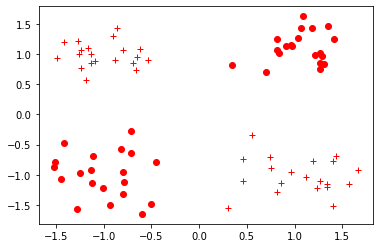

In [9]:
def vis_data(x,y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*',markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [11]:
y_train = [None] * len(x_train)
print(y_train)

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [19]:
print(y_train)

[0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1
 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1
 1 1 1 0 1 1]


In [13]:
print(x_train[0], x_train[1])

[-1.1282036  -1.12905997] [ 1.27159196 -1.10643929]


In [21]:
x_train = torch.FloatTensor(x_train)
print(x_train.shape)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)
print(y_test.shape)

torch.Size([80, 2])
torch.Size([20])


In [22]:
### class 만들기

class NeuralNet(torch.nn.Module):
        def __init__(self, input_size, hidden_size):
            super(NeuralNet, self).__init__()
            
            self.input_size = input_size
            self.hidden_size  = hidden_size
            
            #layer 만들기
            self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
            self.relu = torch.nn.ReLU()
            self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
            self.sigmoid = torch.nn.Sigmoid()
            
        def forward(self, input_tensor):
            linear1 = self.linear_1(input_tensor)
            relu = self.relu(linear1)
            linear2 = self.linear_2(relu)
            output = self.sigmoid(linear2)

            return output

In [23]:
### 여러 변수와 알고리즘 정의
model = NeuralNet(2, 5)
learning_rate = 0.03

# 오차함수 : 이진 교차 엔트로피를 뜻하는 BCELoss()함수사용
criterion = torch.nn.BCELoss()

# epochs : 전체 학습 데이터를 총 몇번 모델에 입력할지 결정하는 변수 
epochs = 2000

# 최적화 알고리즘은 SGD 알고리즘 사용
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [25]:
model.eval()

# 모델의 결과값과 차원을 맞추기 위해 squeeze 사용 
print(x_test.size())
test_loss_before = criterion(model(x_test).squeeze(), y_test)

print(test_loss_before)
# item()을 통해서 텐서 속의 숫자를 스칼라 값으로 변환 
print('Before Training, test loss is {}'.format(test_loss_before.item()))

torch.Size([20, 2])
tensor(0.7358, grad_fn=<BinaryCrossEntropyBackward>)
Before Training, test loss is 0.7358085513114929


오차값이 0.73 이 나왔습니다. 이정도의 오차를 가진 모델은 사실상 분류하는 능력이 없다고 봐도 무방합니다.
자, 이제 드디어 인공신경망을 학습시켜 퍼포먼스를 향상시켜 보겠습니다.

In [26]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    
    if epoch % 100 == 0:
        print('Train loss at {} is {}'.format(epoch, train_loss.item()))
        
    # 역전파를 행하는 코드 !!!!     
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 0.7257314920425415
Train loss at 100 is 0.6455718278884888
Train loss at 200 is 0.5546695590019226
Train loss at 300 is 0.449535071849823
Train loss at 400 is 0.35240715742111206
Train loss at 500 is 0.27760016918182373
Train loss at 600 is 0.22359152138233185
Train loss at 700 is 0.18489111959934235
Train loss at 800 is 0.15636052191257477
Train loss at 900 is 0.1354599893093109
Train loss at 1000 is 0.11957643181085587
Train loss at 1100 is 0.10725884139537811
Train loss at 1200 is 0.09720584750175476
Train loss at 1300 is 0.08880214393138885
Train loss at 1400 is 0.08170019090175629
Train loss at 1500 is 0.07570655643939972
Train loss at 1600 is 0.0706423670053482
Train loss at 1700 is 0.06622600555419922
Train loss at 1800 is 0.06230591982603073
Train loss at 1900 is 0.05880316346883774


In [27]:
model.eval()

test_loss = criterion(model(x_test).squeeze(), y_test) 
print('After Training, test loss is {}'.format(test_loss.item()))

After Training, test loss is 0.06366060674190521


학습을 하기 전과 비교했을때 현저하게 줄어든 오차값을 확인 하실 수 있습니다.
지금까지 인공신경망을 구현하고 학습시켜 보았습니다.
이제 학습된 모델을 .pt 파일로 저장해 보겠습니다.

In [29]:
### state_dict () : 모델 내 가중치들이 딕셔너리 형태로 연산이름 : 가중치 텐서와 편향 텐서 저장

torch.save(model.state_dict(), './model.pt')
print('state_dict format of the model: {}'.format(model.state_dict()))

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[ 1.2862, -0.8929],
        [-0.9229,  1.2907],
        [ 1.0903,  0.9541],
        [ 1.5725, -1.1282],
        [-1.0763,  1.5073]])), ('linear_1.bias', tensor([-0.3823, -0.2875, -0.0545, -0.5096, -0.3336])), ('linear_2.weight', tensor([[ 1.4593,  1.5568, -1.4051,  1.6979,  1.8580]])), ('linear_2.bias', tensor([-2.3962]))])


In [30]:
print(model.state_dict())

OrderedDict([('linear_1.weight', tensor([[ 1.2862, -0.8929],
        [-0.9229,  1.2907],
        [ 1.0903,  0.9541],
        [ 1.5725, -1.1282],
        [-1.0763,  1.5073]])), ('linear_1.bias', tensor([-0.3823, -0.2875, -0.0545, -0.5096, -0.3336])), ('linear_2.weight', tensor([[ 1.4593,  1.5568, -1.4051,  1.6979,  1.8580]])), ('linear_2.bias', tensor([-2.3962]))])


`save()` 를 실행하고 나면 학습된 신경망의 가중치를 내포하는 model.pt 라는 파일이 생성됩니다. 아래 코드처럼 새로운 신경망 객체에 model.pt 속의 가중치값을 입력시키는 것 또한 가능합니다.

In [12]:
new_model = NeuralNet(2, 5)
new_model.load_state_dict(torch.load('./model.pt'))
new_model.eval()
print('벡터 [-1, 1]이 레이블 1을 가질 확률은 {}'.format(new_model(torch.FloatTensor([-1,1])).item()))

벡터 [-1, 1]이 레이블 1을 가질 확률은 0.9912316203117371
